<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/XGBoost_02_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2 결정 트리**
=======================

2.1 결정트리 알고리즘
====================
> * 인구조사 데이터셋을 사용해 수득이 5만달려 이상인지 예측하는 결정트리를 실습

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_census = pd.read_csv('census_cleaned.csv')
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8131679154894976

2.2 분산과 편향
====================

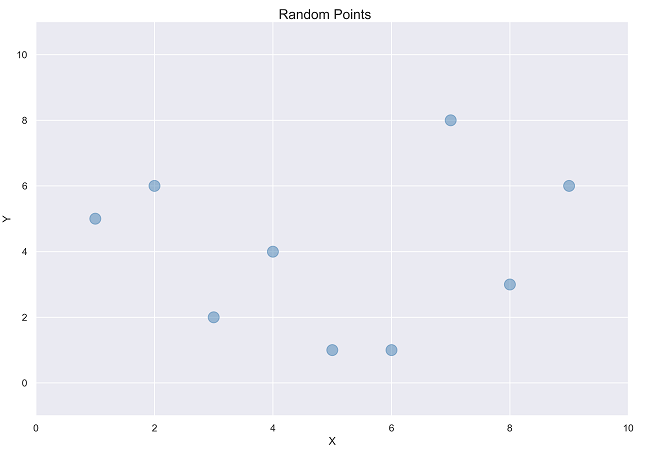

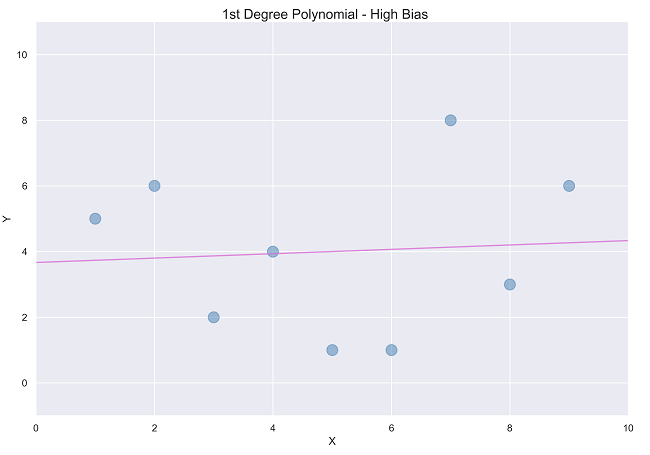

> * 편향이 크고 데이터에 과소적합

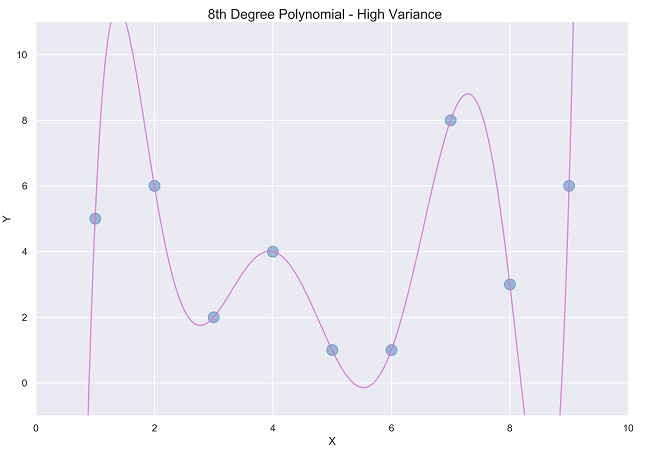

> * 분산이 높고 데이터에 과대적합

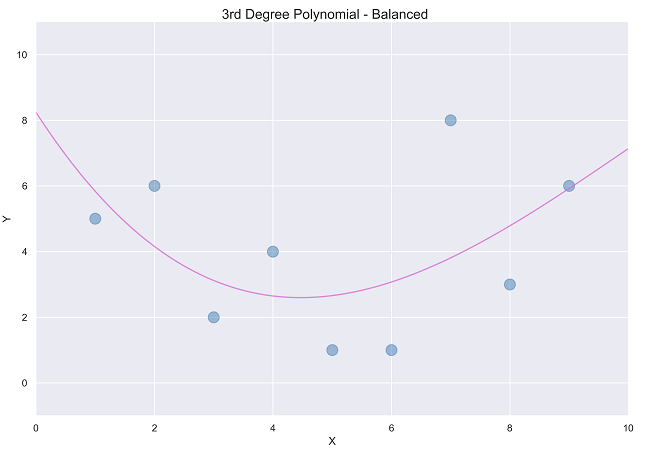

> * 분산과 편향 사이의 균형을 잘 잡기 위해서는 하이퍼파라미터 튜닝이 필요하다

2.3 심장질환 예측하기
====================

> ### 하이퍼파라미터 탐색

In [ ]:
import pandas as pd
df_heart = pd.read_csv('/content/heart_disease.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df_heart.iloc[:,:-1]
y = df_heart.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
# 하이퍼파라미터 튜닝을 하기전에 기준이 될 모델 생성
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(random_state=2)
scores = cross_val_score(model, X, y, cv=5)
print('정확도:', np.round(scores, 2))
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.74 0.85 0.77 0.73 0.7 ]
정확도 평균: 0.76


> * GridSearchCV: 모든 조합에 대해 교차검증 후 가장 좋은 성능을 내는 하이퍼파라미터 조합을 찾는다.
> * RandomizedSearchCV: 모든 조합을 다 시도하지는 않고, 각 반복마다 임의의 값을 대입하여 지정한 횟수만큼 평가한다. 

In [ ]:
# RandomizedSearchCV로 점수를 출력하고 최상의 모델을 반환하는 함수 생성
from sklearn.model_selection import RandomizedSearchCV
def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
  rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) # n_iter: 파라미터 조합 검색 횟수
  rand_clf.fit(X_train, y_train)
  best_model = rand_clf.best_estimator_
  best_score = rand_clf.best_score_
  print("훈련 점수: {:.3f}".format(best_score))
  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('테스트 점수: {:.3f}'.format(accuracy))
  return best_model

In [ ]:
# 하이퍼파라미터 선택
randomized_search_clf(
    params={
        'criterion':['entropy', 'gini'],  # 불순도 측정 
        'splitter':['random', 'best'],  # 노드에서 분할하는 방법, best:정보이득이 최대가 되게, random:랜덤하게
        'min_samples_split':[2,3,4,5,6,8,10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],   # 리프노드 최대 갯수
        'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],  # auto:전체특성사용, sqrt:전체특성개수 제곱근
        'max_depth':[None,2,4,6,8],
         # 모든샘플의 가중치의 합에대해, 각 리프노드가 가지는 최소 가중치 비율 
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.0005, 0.0075, 0.01, 0.05] 
    }
)

훈련 점수: 0.798
테스트 점수: 0.855


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [ ]:
# 탐색범위를 좁히고 탐색횟수 증가
best_model = randomized_search_clf(
    params={
        'min_samples_split':[2,9,10],
        'max_leaf_nodes':[45, None],
        'max_features':['auto', 0.78],
        'max_depth':[None,6,7],
        'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
        'min_weight_fraction_leaf':[0.0, 0.05, 0.06, 0.07]}, runs=100
)

훈련 점수: 0.802
테스트 점수: 0.868


In [ ]:
# 변환된 최상의 모델을 전체 데이터셋에서 교차검증
scores = cross_val_score(best_model, X, y, cv=5)
print('정확도:', np.round(scores, 2))
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.82 0.9  0.8  0.8  0.78]
정확도 평균: 0.82


In [ ]:
# 연속적인 매개변수 값 탐색하기
# 로그균등분포 클래스인 loguniform과 이산균등분포인 randint를 사용
from sklearn.utils.fixes import loguniform
from scipy.stats import randint

params = {
        'min_samples_split':loguniform(1e-5,1),
        'min_samples_leaf':loguniform(1e-5,1),
        'min_impurity_decrease':loguniform(1e-5,1),
        'max_leaf_nodes':randint(1, 100),
        'max_features':loguniform(1e-5,1),
        'max_depth': randint(1,100),
        'min_weight_fraction_leaf':loguniform(1e-5,1)    
}

dtc = DecisionTreeClassifier(random_state=0)
rs = RandomizedSearchCV(dtc, params, n_iter=100, n_jobs=-1, random_state=0)
rs.fit(X_train, y_train)

print('최상의 교차 검증 점수:', rs.best_score_)
print('최상의 매개변수:', rs.best_params_)

최상의 교차 검증 점수: 0.7932367149758455
최상의 매개변수: {'max_depth': 48, 'max_features': 0.43091880545542754, 'max_leaf_nodes': 68, 'min_impurity_decrease': 0.0013196080073784372, 'min_samples_leaf': 0.005935250363740932, 'min_samples_split': 0.00027243167437771866, 'min_weight_fraction_leaf': 0.03410935690756259}


> ### 특성 중요도

In [ ]:
# 최종 모델을 선택한 후에는 전체 데이터셋을 사용해 모델을 훈련하는것이 정확도를 더 높여줌
# 하지만 테스트 세트가 없어지기 때문에 실전에 대한 성능을 추정하기 어려워지는 단점이 있음
best_model.fit(X, y)

DecisionTreeClassifier(max_depth=7, max_features=0.78, max_leaf_nodes=45,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, random_state=2)

In [ ]:
# 특성이름과 특성 중요도를 딕셔너리로 생성
# 딕셔너리는 한쌍이 하나의 대응관계를 가지고 있는 자료형 
feature_dict = dict(zip(X.columns, best_model.feature_importances_))
import operator
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[0:3]

[('cp', 0.4840958610240171),
 ('thal', 0.20494445570568706),
 ('ca', 0.18069065321397942)]